# A Novel Kernel-Based Approach For Uneven length Symbolic Data: A Case Study for Establishing Type 2 Diabetes Risk


### BOW Logistic Regression


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from util_log import *

In [2]:
df_BoW = pd.read_csv('./SBag_of_words.csv', header=None)
df_BIN = pd.read_csv('./SBinaryCount.csv', header=None)

In [3]:
labelloc = './LogRegressProj/ytr.csv'
label = pd.read_csv(labelloc, header=None)

In [4]:
#Change the -ve label from -1 to 0
label.replace({-1:0}, inplace=True)

In [5]:
#Extract the labels
ytr = label.values
ytr.shape

(158, 1)

In [6]:
#Extract the Data
BoW = df_BoW.values
BIN = df_BIN.values

print(f'--> Size of BoW features --- {BoW.shape}')
print(f'--> Size of BIN features --- {BIN.shape}')

--> Size of BoW features --- (158, 3054)
--> Size of BIN features --- (158, 3054)


## Run LOOCV Logistic Regression on BoW

In [7]:
#Run logistic Regression
cv_Bow     = LeaveOneOut()
LR_Bow     = LogisticRegression()
scores_Bow = cross_val_score(LR_Bow, BoW, ytr, scoring='accuracy', cv=cv_Bow, n_jobs=-1)

print('--> Bag-of-Words Accuracy: %.3f (%.3f)' % (np.mean(scores_Bow), np.std(scores_Bow)))

--> Bag-of-Words Accuracy: 0.570 (0.495)


In [8]:
#Predict
Y_pred_Bow = cross_val_predict(LR_Bow, BoW, ytr, cv=cv_Bow, n_jobs=-1)

--> The total of 158 predicted with only 90 accurate predictions

Ground Truth comparison

Actual label is True while we predicted True   -  True Positive  =  35
Actual label is False while we predicted False -  True Negatve   =  55
Actual label is False while we predicted True  -  False Positive =  31
Actual label is True while we predicted False  -  False Negative =  37


--> 66 positive outcomes predicted
--> 92 negative outcomes predicted
--> An accuracy of 56.96 % was achieved
--> Sensitity of 0.49 was achieved
--> Specificity of 0.64 was achieved 
--> 0.42 rate of positive prediction
--> 0.58 rate of negative prediction
--> 0.51 false negative rate was achieved
--> 0.36 false positve rate (fallout) was achieved
--> Negative predictive value of 0.6
--> Recall value 0f 0.49 achieved
--> The precision vaue of 0.53 achieved
--> An Fscore of 0.51 achieved


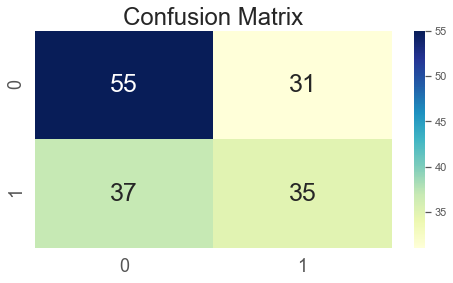

In [9]:
#Extract evaluation metric on Train set
eva_Train_Bow = EvaluateTest(Y_pred_Bow, np.squeeze(ytr))

## Run Logistic Regression on BIN

In [10]:
#Run logistic Regression
cv_BIN     = LeaveOneOut()
LR_BIN     = LogisticRegression()
scores_BIN = cross_val_score(LR_BIN, BIN, ytr, scoring='accuracy', cv=cv_BIN, n_jobs=-1)

print('--> Binary Bag-of-Words Accuracy: %.3f (%.3f)' % (np.mean(scores_BIN), np.std(scores_BIN)))

--> Binary Bag-of-Words Accuracy: 0.703 (0.457)


In [11]:
#Preditc
Y_pred_BIN = cross_val_predict(LR_BIN, BIN, ytr, cv=cv_BIN, n_jobs=-1)

--> The total of 158 predicted with only 111 accurate predictions

Ground Truth comparison

Actual label is True while we predicted True   -  True Positive  =  41
Actual label is False while we predicted False -  True Negatve   =  70
Actual label is False while we predicted True  -  False Positive =  25
Actual label is True while we predicted False  -  False Negative =  22


--> 66 positive outcomes predicted
--> 92 negative outcomes predicted
--> An accuracy of 70.25 % was achieved
--> Sensitity of 0.65 was achieved
--> Specificity of 0.74 was achieved 
--> 0.42 rate of positive prediction
--> 0.58 rate of negative prediction
--> 0.35 false negative rate was achieved
--> 0.26 false positve rate (fallout) was achieved
--> Negative predictive value of 0.76
--> Recall value 0f 0.65 achieved
--> The precision vaue of 0.62 achieved
--> An Fscore of 0.63 achieved


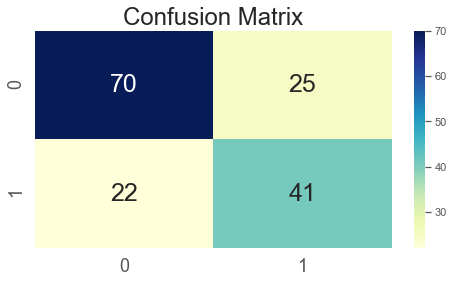

In [12]:
#Extract evaluation metric on Train set
eva_Train_BIN = EvaluateTest(Y_pred_BIN, np.squeeze(ytr))

## Extract Results

In [13]:
Tra_Bow  = list(eva_Train_Bow.values())
Tra_BIN  = list(eva_Train_BIN.values())
keysList = list(eva_Train_Bow.keys())

In [14]:
Result = pd.DataFrame(zip(Tra_Bow,Tra_BIN),index=keysList, columns=['Tra_Bow','Tra_BIN'])
Result

,Tra_Bow,Tra_BIN
Pos,66.00,66.00
Neg,92.00,92.00
Accu,56.96,70.25
Sen,0.49,0.65
Spec,0.64,0.74
RPP,0.42,0.42
RNP,0.58,0.58
Miss,0.51,0.35
Fall,0.36,0.26
NPV,0.60,0.76


In [15]:
Result.loc[['Fscore','Accu','Sen','Spec' ],:].T

,Fscore,Accu,Sen,Spec
Tra_Bow,0.51,56.96,0.49,0.64
Tra_BIN,0.63,70.25,0.65,0.74
